<font size=12, color=blue>Pandemiculator : A Pandemic calculator for estimating population epidemiology scenario in India</font>

Pandemiculator	(Pandemic Calculator) is	based	on	using	statistical and mathematical	epidemic	models	to	predict	the	number	of	cases	infected	with	COVID-19	(SARS-nCOV-2	virus	caused	disease).	The	goal	is	to showcase the current scenario in India and	predict	the	number	of	infected	cases	using regression in	a	population along with the growth factor	using mathematical models like SEIRD	to help	the	agencies	better	understand,	mitigate,	and	suppress	its	spread. The clustering of population can help in inderstanding risks based on clinical parameters of various age group and also to develop vaccinnation strategy once vaccinne is developed with the help of SEIRV model.




## METHODOLOGY

The	following	methodology	is	followed:
* Preparation	of	data
* Grouping	data	by	growth	factor
* Trend	analysis
* Factors	of	model	parameters
* Scenario	in	India
* Applying	SEIRD	model	with	lockdown/wothout	lockdown	parameters
* Prediction	based	on	clinical,	population	and	epidemiology	parameters
* Vaccination optimization strategy

In [2]:
#Mounting the Drive for data access
#from google.colab import drive
#drive.mount('/content/drive')
#% cd '/content/drive/My Drive/'
#!pwd

### LIBRARIES

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import requests
import json 
import csv
import matplotlib
import matplotlib.pyplot as plt
import folium as fa
# Install geopandas with pip
!pip install -q geopandas
import geopandas as gpd
import seaborn as sns
from scipy.integrate import odeint
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import random
import warnings
warnings.filterwarnings("ignore")
print("import done")

import done


### DATA FETCHING AND PREPROCESSING

There is no treatment recommended for COVID-19 as of now and we are waiting for vaccine to be developed.  According to the dataset the major reason for the infection is being in contact with patients. There are different reasons for the cause of infection mainly visits to countries and regions like Wuhan China, Italy, Malaysia etc.

In [4]:
#COVID-19_India_Forcasting_state_Wise_daily

#getjson data from url and storing it on local system

url = 'https://api.covid19india.org/states_daily.json'

data = requests.get(url=url).json()
data = json.dumps(
    data,
    indent=2,
    ensure_ascii=False,
)

f = open('pandemiculator/data/states_daily.json', 'w')
f.write(data)
f.close()
# JSON file to CSV 
# Opening JSON file and loading the data 
# into the variable data 

with open('pandemiculator/data/states_daily.json') as json_file: 
    data = json.load(json_file) 

patient_data = data['states_daily'] 

# now we will open a file for writing 
data_file = open('pandemiculator/data/states_daily.csv', 'w') 

# create the csv writer object 
csv_writer = csv.writer(data_file) 

# Counter variable used for writing 
# headers to the CSV file 
count = 0

for pt in patient_data: 
    if count == 0: 

        # Writing headers of CSV file 
        header = pt.keys() 
        csv_writer.writerow(header) 
        count += 1

    # Writing data of CSV file 
    csv_writer.writerow(pt.values()) 

data_file.close() 
print("done")


done


The datasets are taken from covid19india.org a volunteer-driven, crowdsourced database for COVID-19 stats & patient tracing in India. This repository is just a small subset of work put together by a much larger pool of voluntary efforts contributed by generous people all around the world. Reach out to us through hello@covid19india.org. MoHFW official updates the data at a scheduled time. However, covid19india.org update them based on state press bulletins, official (CM, Health M) handles, PBI, Press Trust of India, ANI reports. These are generally more recent.

In [5]:
india_map = gpd.read_file('pandemiculator/data/Map/Admin2.shp')
india_map.rename(columns = {'ST_NM':'States'}, inplace = True)
#map_data.columns=['State','geomerty']


### INDIAN COVID19 CURRENT SITUATION

In [6]:
url = 'https://api.covid19india.org/data.json'
 
data = requests.get(url=url).json()
data = json.dumps(
    data,
    indent=2,
    ensure_ascii=False,
)
 
f = open('pandemiculator/data/data.json', 'w')
f.write(data)
f.close()
# JSON file to CSV 
# Opening JSON file and loading the data 
# into the variable data 
with open('pandemiculator/data/data.json') as json_file: 
    data = json.load(json_file) 
 
patient_data = data['cases_time_series'] 
 
# now we will open a file for writing 
data_file = open('pandemiculator/data/data.csv', 'w') 
 
# create the csv writer object 
csv_writer = csv.writer(data_file) 
 
# Counter variable used for writing 
# headers to the CSV file 
count = 0
 
for pt in patient_data: 
    if count == 0: 
 
        # Writing headers of CSV file 
        header = pt.keys() 
        csv_writer.writerow(header) 
        count += 1
 
    # Writing data of CSV file 
    csv_writer.writerow(pt.values()) 
 
data_file.close() 
print("done")

done


In [7]:
covid_raw_data= pd.read_csv(r"pandemiculator/data/data.csv",sep=",",encoding='cp1252')
covid_confirmed= pd.DataFrame(covid_raw_data)
days = np.array([i for i in range(len(covid_confirmed['date']))])


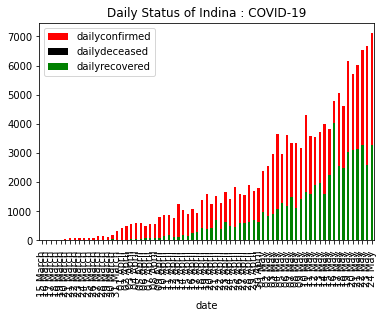

In [8]:
daily_status= covid_raw_data[['date','dailyconfirmed','dailydeceased','dailyrecovered']].copy()
SKIP_DAYS=45
daily_status=daily_status[SKIP_DAYS:]
ax = daily_status.plot(x="date", y="dailyconfirmed", kind="bar",color='red')
daily_status.plot(x="date", y="dailydeceased", kind="bar", ax=ax, color='black')
daily_status.plot(x="date", y="dailyrecovered", kind="bar", ax=ax, color="green")
plt.rcParams["figure.figsize"] = [20,10]
plt.title('Daily Status of Indina : COVID-19')

plt.show()

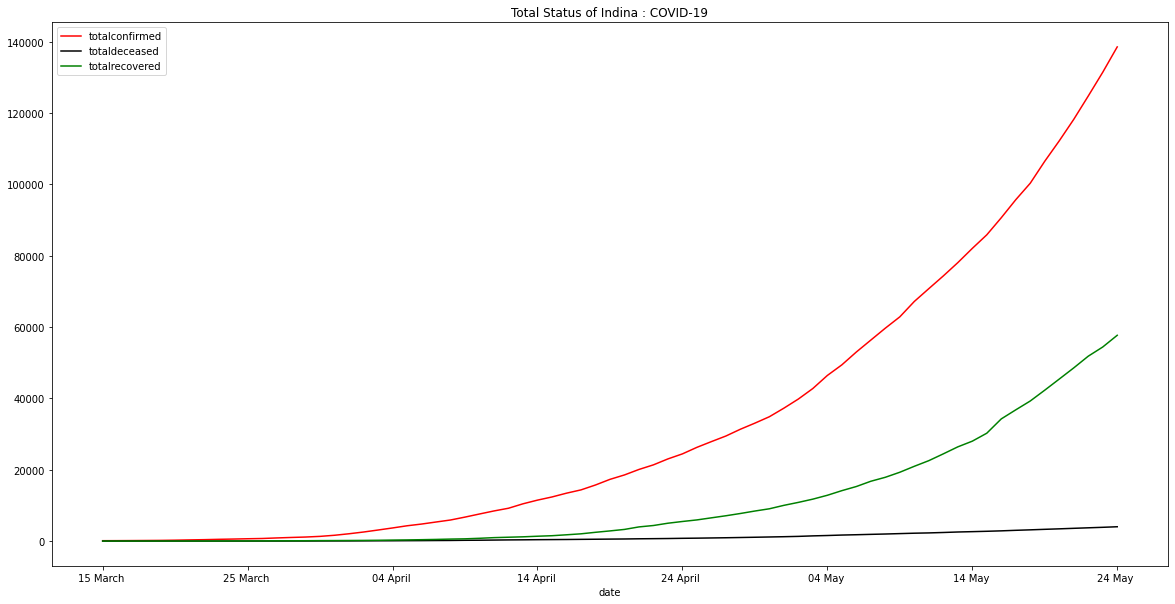

In [9]:
total_cases= covid_raw_data[['date','totalconfirmed','totaldeceased','totalrecovered']].copy()
SKIP_DAYS=45
total_cases=total_cases[SKIP_DAYS:]
total_cases
ax = total_cases.plot(x="date", y="totalconfirmed", kind="line",color='red')
total_cases.plot(x="date", y="totaldeceased", kind="line", ax=ax, color='black')
total_cases.plot(x="date", y="totalrecovered", kind="line", ax=ax, color="green")
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Total Status of Indina : COVID-19')

plt.show()

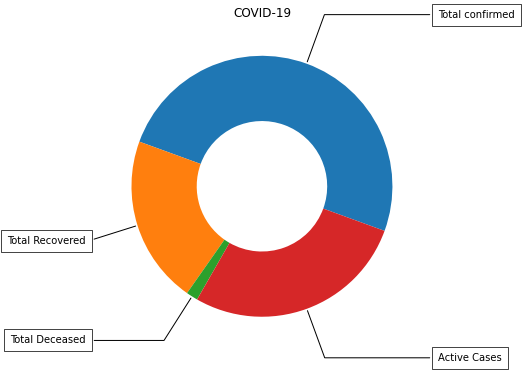

In [10]:
totalconfirmed=total_cases.loc[total_cases.index[-1], "totalconfirmed"] 
totaldeceased=total_cases.loc[total_cases.index[-1], "totaldeceased"] 
totalrecovered=total_cases.loc[total_cases.index[-1], "totalrecovered"]
active_case=totalconfirmed-totalrecovered-totaldeceased

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
cases = ["Total confirmed",
          "Total Recovered",
          "Total Deceased","Active Cases"]

data = [totalconfirmed,totalrecovered,totaldeceased,active_case]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-20)

bbox_props = dict(boxstyle="square,pad=0.6", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cases[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("COVID-19")

plt.show()

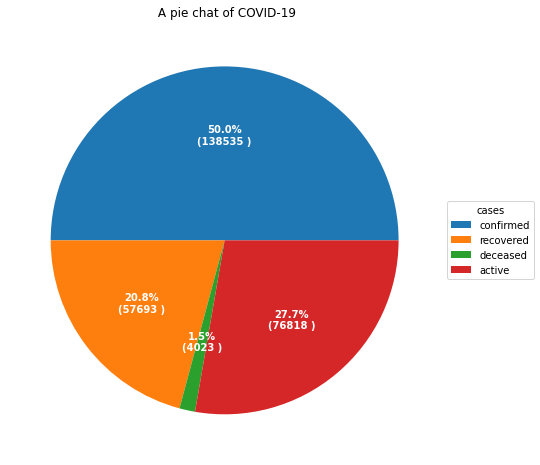

In [11]:

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

cases = ["Total confirmed",
          "Total Recovered",
          "Total Deceased","Total Active"]

data = [totalconfirmed,totalrecovered,totaldeceased,active_case]
box = ['confirmed','recovered','deceased','active']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, box,
          title="cases",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title(" A pie chat of COVID-19")
plt.get_cmap('RdYlBu')
plt.show()


### DISPLAYING THE CURRENT TREND

In [12]:
Indina_state={
    "an":"Andaman and Nicobar Islands","ap":"Andhra Pradesh","ar":"Arunachal Pradesh","as":"Assam","br":"Bihar","ct":"Chandigarh","ch":"Chhattisgarh","dn":"Dadra and Nagar Haveli","dd":"Daman and Diu","dl":"Delhi","ga":"Goa","gj":"Gujarat","hr":"Haryana","hp":"Himachal Pradesh",
    "jk":"Jammu and Kashmir","jh":"Jharkhand","ka":"Karnataka","kl":"Kerala","la":"Ladakh","ld":"Lakshadweep","mp":"Madhya Pradesh","mh":"Maharashtra","mn":"Manipur","ml":"Meghalaya","mz":"Mizoram","nl":"Nagaland","or":"Odisha","py":"Puducherry","pb":"Punjab","rj":"Rajasthan","sk":"Sikkim","tn":"Tamil Nadu",
    "tg":"Telangana","tr":"Tripura","up":"Uttar Pradesh","ut":"Uttarakhand","wb":"West Bengal"
}

state = {s:a for s,a in Indina_state.items()}


In [13]:

india_map = gpd.read_file('pandemiculator/data/Map/Admin2.shp')
india_map.rename(columns = {'ST_NM':'States'}, inplace = True)
#map_data.columns=['State','geomerty']


In [14]:
#getjson data from url and storing it on local system

url = 'https://api.covid19india.org/states_daily.json'

data = requests.get(url=url).json()
data = json.dumps(
    data,
    indent=2,
    ensure_ascii=False,
)

f = open('pandemiculator/data/states_daily.json', 'w')
f.write(data)
f.close()
# JSON file to CSV 
# Opening JSON file and loading the data 
# into the variable data 

with open('pandemiculator/data/states_daily.json') as json_file: 
    data = json.load(json_file) 

patient_data = data['states_daily'] 

# now we will open a file for writing 
data_file = open('pandemiculator/data/states_daily.csv', 'w') 

# create the csv writer object 
csv_writer = csv.writer(data_file) 

# Counter variable used for writing 
# headers to the CSV file 
count = 0

for pt in patient_data: 
    if count == 0: 

        # Writing headers of CSV file 
        header = pt.keys() 
        csv_writer.writerow(header) 
        count += 1

    # Writing data of CSV file 
    csv_writer.writerow(pt.values()) 

data_file.close() 
print("done")

done


In [15]:
raw_data  = pd.read_csv(r"pandemiculator/data/states_daily.csv",sep=",",encoding='cp1252')
data= pd.DataFrame(raw_data)
data=data.loc[data['status']== 'Confirmed']
del data['status']
del data['tt']
del data['date']
cols= data.columns
StateWise_data=pd.DataFrame(data.sum(axis = 0, skipna = True))
StateWise_data=StateWise_data.reset_index()
StateWise_data.columns=['States','Count']
StateWise_data_map=StateWise_data.copy()


In [16]:
StateWise_data_map['States'] = StateWise_data_map['States'].map(state)


In [17]:
Infection_map_data = pd.merge(india_map, StateWise_data_map, how = 'left', on = 'States')
Infection_map_data.fillna(0, inplace = True)


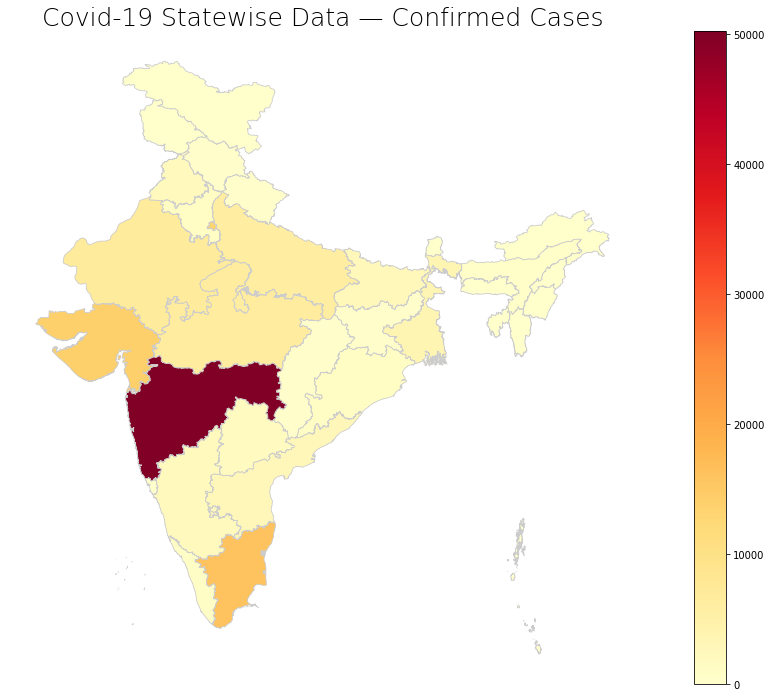

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
Infection_map_data.plot(column = 'Count', cmap='YlOrRd', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

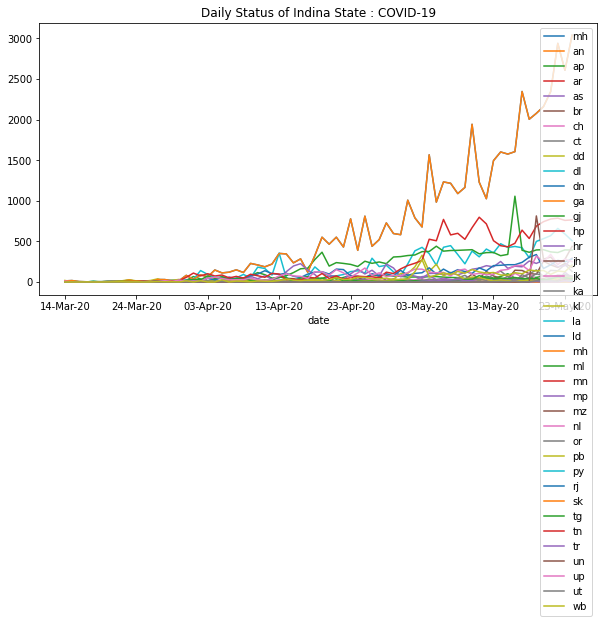

In [19]:

raw_data  = pd.read_csv(r"pandemiculator/data/states_daily.csv",sep=",",encoding='cp1252')
data1= pd.DataFrame(raw_data)
data1=data1.loc[data1['status']== 'Confirmed']

data1=data1[[ 'date','tt','status','an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la',
 
 'ld','mh','ml','mn','mp','mz','nl','or','pb','py','rj','sk','tg','tn','tr','un','up','ut','wb']]

cols = list(data1.columns.values)
ax = data1.plot(x="date", y="mh", kind="line")
for i in cols[3:len(cols)]:
  data1.plot(x="date", y=i, kind="line", ax=ax)
plt.rcParams["figure.figsize"] = [10,12]
#ax.legend(lo, bbox_to_anchor=(0.6,0.5))
plt.title('Daily Status of Indina State : COVID-19')
plt.show()

### COVID-19 CASES ON INDIA MAP : STATEWISE

In [20]:
raw_data  = pd.read_csv(r"pandemiculator/data/states_daily.csv",sep=",",encoding='cp1252')
data= pd.DataFrame(raw_data)
data=data.loc[data['status']== 'Confirmed']
del data['status']
del data['tt']
del data['date']
del data['un']
cols= data.columns
StateWise_data=pd.DataFrame(data.sum(axis = 0, skipna = True))
StateWise_data=StateWise_data.reset_index()
StateWise_data.columns=['State','Count']

In [21]:
StateWise_data['State'] = StateWise_data['State'].map(state)

In [22]:
India=pd.DataFrame(pd.read_csv('pandemiculator/data/ini.csv'))
India_state=India.loc[India['capital'] == 'admin']
col=['admin','city', 'lat', 'lng']
India_state=India_state[col]
India_state=India_state.rename({'admin':'State'},axis=1)
India_state=India_state.reset_index()
del India_state['index']
India_state.index = India_state.index+1


In [23]:
Infection_State= StateWise_data.merge(India_state,on="State",how='left')
limit=15
#Infection_State=Infection_State.iloc[0:limit, :]
Infection_State_map=Infection_State.copy()
Infection_State['Count'] = Infection_State['Count'].apply(str)
Infection_State["messange"] = Infection_State["State"] +" : "+ Infection_State["Count"]


In [24]:
longitude=19.663280
latitude=75.300293
India_map = fa.Map(location=[longitude, latitude], zoom_start=5, tiles='Stamen Terrain')
infection = fa.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Infection_State.lat, Infection_State.lng):
    infection.add_child(
        fa.CircleMarker(
            [latitude, longitude],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
India_map.add_child(infection)
# instantiate a feature group for the incidents in the dataframe
import folium

longitude=19.663280
latitude=75.300293
infection= folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Infection_State.lat, Infection_State.lng):
    infection.add_child(
        folium.CircleMarker(
            [latitude, longitude],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Infection_State.lat)
longitudes = list(Infection_State.lng)
labels = list(Infection_State.messange)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(India_map)    
    
# add incidents to map
India_map.add_child(infection)


India_map = folium.Map(location=[ longitude,latitude], zoom_start=5)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(Infection_State.lat, Infection_State.lng, Infection_State.messange):
    folium.CircleMarker(
        [lat, lng],
        radius=10, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(India_map)

# show map
India_map


## MATHEMATICAL COMPARTMENTAL MODELS IN EPIDEMIOLOGY

SEIRD is an epidemiological model used to predict infectious disease dynamics by compartmentalizing the population into possible states: Susceptible [S], Exposed or latent [E], Infectious [I] or Recovered [R] Dead [D] . The proportion of a population in each state is governed by the rate of change between each, β ([S] to [E]), σ ([E] to [I]) ,γ ([I] to [R]) and Δ ([I] to [D]). The solution of the model is obtained by solving a set of differential equations. Basic Reproduction Number (R0): the expected number of secondary infections generated by a single, typical infection in a completely susceptible population.

![picture](https://drive.google.com/uc?id=1uzNVLrl2oY8HPdZxjQhU_ij9TG357E91)

![picture](https://drive.google.com/uc?id=1HsCFj1U3QX1KLzoGGpgQQAMIqYhFmmwo)

**Basic Reproduction Number (Ro)** the expected number of secondary infections generated by a single, typical infection in a completely susceptible population.

**Importance of Ro in spidemic:**
* Ro is the threshold parameter, determining whether or not there will be an epidemic
* Ro determines the initial rate of increase of an epidemic (i.e., during its exponential growth phase)
* Ro determines the final size of the epidemic (i.e., what fraction of susceptibles will ultimately be infected over the course of the outbreak)
* Ro determines the endemic equilibrium fraction of susceptibles in the population (= 1/Ro)
* Ro determines the critical vaccination threshold (= 1/Ro)

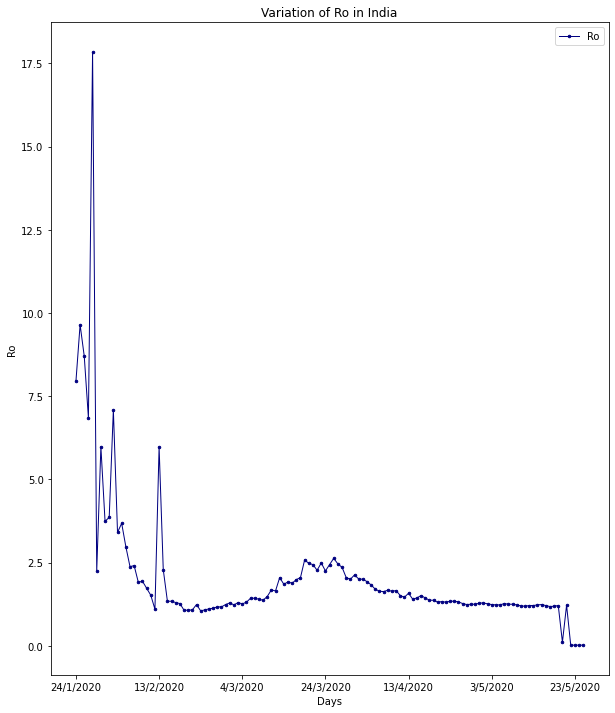

In [25]:
df  = pd.read_csv('pandemiculator/data/Ro.csv')
#print(df.describe())
#print(df)
ax=df.plot(x="Date",y="Ro",colormap='jet',lw=1, marker='.', markersize=5, 
       title='Variation of Ro in India')  
#df.plot(kind='scatter',x ='Date',y ='Ro') # scatter plot
#ax=df.plot(kind='density')  # estimate density function
#df.plot(kind='hist')  # histogram
ax.set_xlabel("Days")
ax.set_ylabel("Ro")
#df.plot.setp(ax.get_xticklabels(), rotation=45)

#mean Ro
#df1 = pd.DataFrame(index=range(1, 5), columns = ['Ro'])

#df1=df
#print(df1)

df  = pd.read_csv('pandemiculator/data/Ro.csv',index_col ="Date")
rowsbeforeld = df.loc['24/1/2020':'25/3/2020'] 
#print(rowsbeforeld)
rowsafterld = df.loc['26/3/2020':'25/5/2020']
#print(rowsafterld)
#col1 = df.loc[:,"Ro"]
#print(col1)
meanRob = rowsbeforeld.mean()
meanRobeforeld=meanRob.Ro
#print(meanRobeforeld)


meanRoa = rowsafterld.mean()
meanRoafterld=meanRoa.Ro
#print(meanRoafterld)

#print(meanRoafterld)
#print(meanRo)

In [26]:
# Define the SEIRD function
def SEIRD_FN ( v , t , beta , epsilon , gamma , delta , N ):
    S, E, I, R, D = v
    dS_dt = -beta * S * I / N 
    dE_dt = beta * S * I / N - epsilon * E 
    dI_dt = epsilon * E - gamma * I - delta * I
    dR_dt = gamma * I 
    dD_dt = delta * I
    return([dS_dt, dE_dt, dI_dt, dR_dt, dD_dt])

In [27]:
# Define the parameters
tmax= 365 #days
dt= 1 

# Initialize the variables
S0 = 100
E0 = 1
I0 = 0
R0 = 0 # this is removed population not Ro
D0 = 0
N = S0 + E0 + I0 + R0 + D0
initial_state = [ S0, E0, I0, R0, D0 ]

In [28]:
# Calculate the rate constants
#Rate of infection
# Infection rate 
#beta = 4

#Rate of infection after exposure
latency_time=14 #days
epsilon_bfld = 1/latency_time

# Rate of recovery after infection
recovery_time=30 #days
gamma_bfld = 1/recovery_time

#Death rate
delta_bfld = 0.02 # 2%  mortality

#Ro Ro (before lockdown) = 2.72
#Ro= beta/gamma
#meanRobeforeld=1
print(meanRobeforeld)
beta_bfld= meanRobeforeld*gamma_bfld
print(beta_bfld)


2.716451612903226
0.09054838709677421


In [29]:
#with interventions

# Calculate the rate constants
#Rate of infection

# Infection rate 
#beta = 4


#Rate of infection after exposure
latency_time=14 #days
epsilon_afld = 1/latency_time

# Rate of recovery after infection
recovery_time=30 #days
gamma_afld = 1/recovery_time

#Death rate
delta_afld = 0.02 # 2%  mortality

#Ro after lockdown Ro=1.367049
#Ro= beta/gamma
#meanRoafterld=2.716
print(meanRoafterld)
beta_afld=meanRoafterld*gamma_afld
print(beta_afld)

1.3670491803278686
0.045568306010928955


In [30]:
# Solving the differential equations before lockdown

steps = np . arange ( 0 , tmax , dt )
args = ( beta_bfld , epsilon_bfld , gamma_bfld , delta_bfld ,N )
solution_bfld = odeint ( SEIRD_FN , initial_state , steps , args )
#print(solution_bfld)


In [31]:
# Solving the differential equations after lockdown

steps = np . arange ( 0 , tmax , dt )
args = ( beta_afld , epsilon_afld , gamma_afld , delta_afld ,N )
solution_afld = odeint ( SEIRD_FN , initial_state , steps , args )
#print(solution_afld)

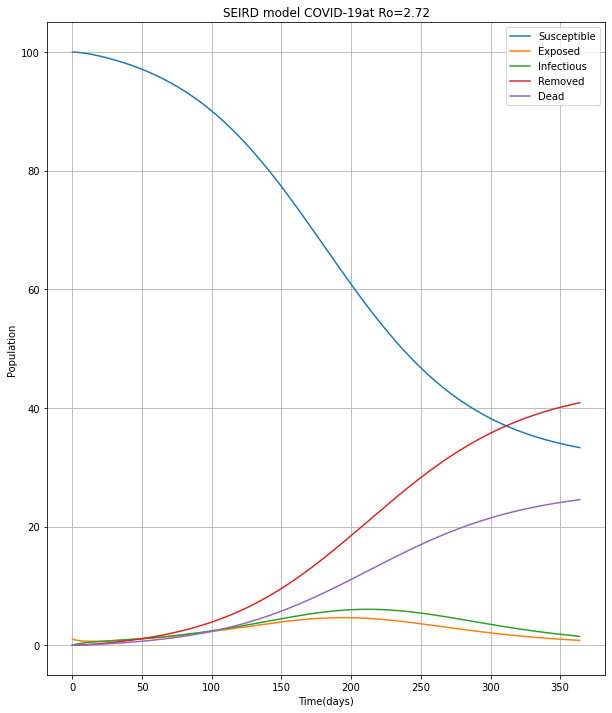

In [32]:
# Plot the graph
plt . plot ( steps , solution_bfld  )
plt . legend (['Susceptible' , 'Exposed' , 'Infectious' , 'Removed', 'Dead'])
plt . title ( "SEIRD model COVID-19"+"at Ro="+ str(round(meanRobeforeld, 2)) )
plt . xlabel ( 'Time(days)' )
plt . ylabel ( 'Population' )
plt . grid ()
plt . show ()

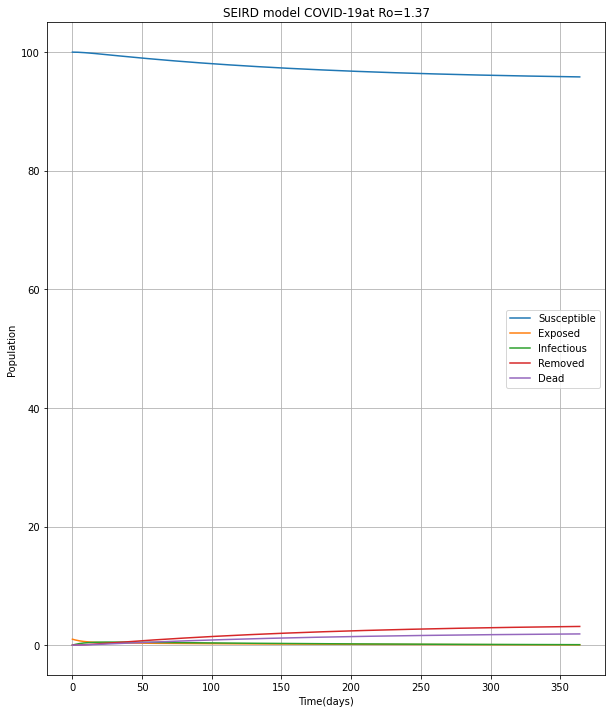

In [33]:
# Plot the graph
plt . plot ( steps , solution_afld )
plt . legend ([ 'Susceptible' , 'Exposed' , 'Infectious' , 'Removed', 'Dead'])
plt . title ( "SEIRD model COVID-19"+"at Ro="+ str(round(meanRoafterld, 2)) )
plt . xlabel ( 'Time(days)' )
plt . ylabel ( 'Population' )
plt . grid ()
plt . show ()

## PREDICTION OF THE PANDEMIC BASED ON REGRESSION AND PROPHET

In [34]:
#Regression and Prophet model based predictions

In [35]:
plt.style.use('fivethirtyeight') # For plots

In [36]:
covid_data=pd.read_csv("pandemiculator/data/time_series_covid19_confirmed_global.csv", sep=",")

## group by country, sum and transpose
## group by country, sum and transpose
covid_prophet = covid_data.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T

## convert index to datetime
covid_prophet.index = pd.to_datetime(covid_prophet.index, infer_datetime_format=True)

## create total cases column
covid_prophet = pd.DataFrame(index=covid_prophet.index, data=covid_prophet["India"].values, columns=["total"])
## create new cases column
#covid_prophet["dailyConfirm"] = covid_prophet["total"] - covid_prophet["total"].shift(1)
#covid_prophet["dailyConfirm"] = covid_prophet["dailyConfirm"].fillna(method='bfill')
SKIP_DAYS=30
covid_prophet=covid_prophet[SKIP_DAYS:]
covid_prophet['date']=covid_prophet.index
covid_prophet=covid_prophet.reset_index(drop=True)
#covid_prophet=covid_prophet.drop(columns=['total'])
#covid_prophet

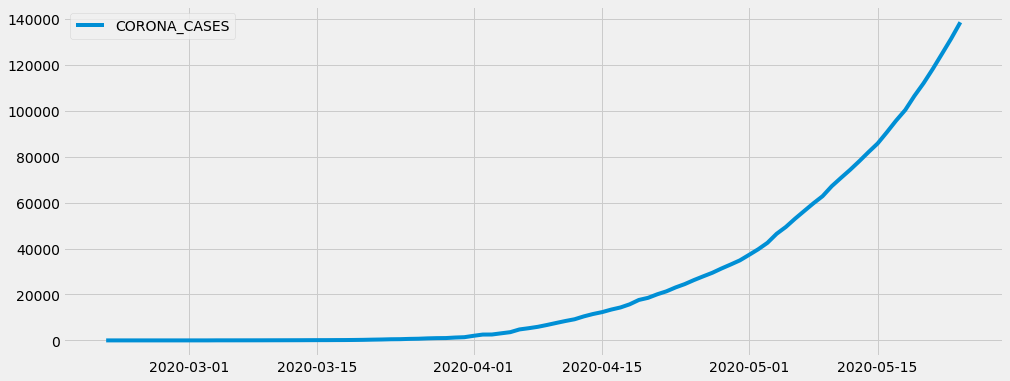

In [37]:
plt.figure(figsize=(15,6))
plt.plot(covid_prophet.set_index('date'))
plt.legend(['CORONA_CASES'])
#covid_prophet.dtypes

In [38]:
covid_prophet.columns = ['y','ds']
covid_prophet.head()
prophet=covid_prophet.copy()
#prophet

In [39]:
train = prophet.iloc[30:70, :]
test = prophet.iloc[70:, :]
unused = prophet.iloc[:30, :]
#train.dtypes

In [40]:
model= Prophet(daily_seasonality=True)
model.fit(train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [41]:
test_forcst= model.predict(df=test)

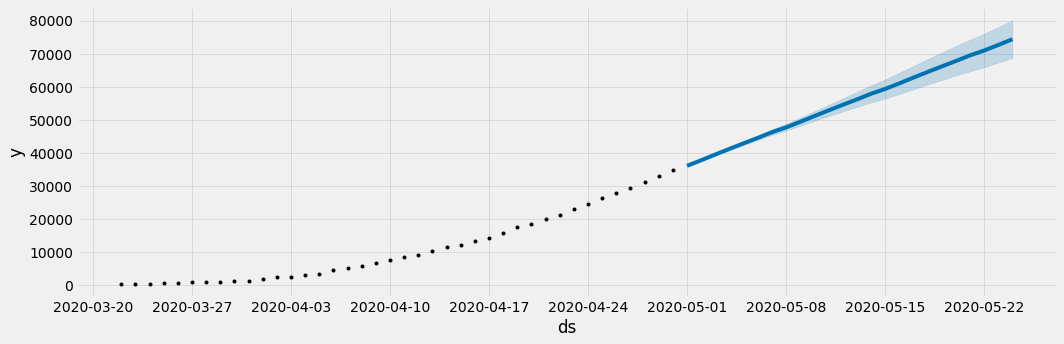

In [42]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_forcst,
                 ax=ax)
plt.show()

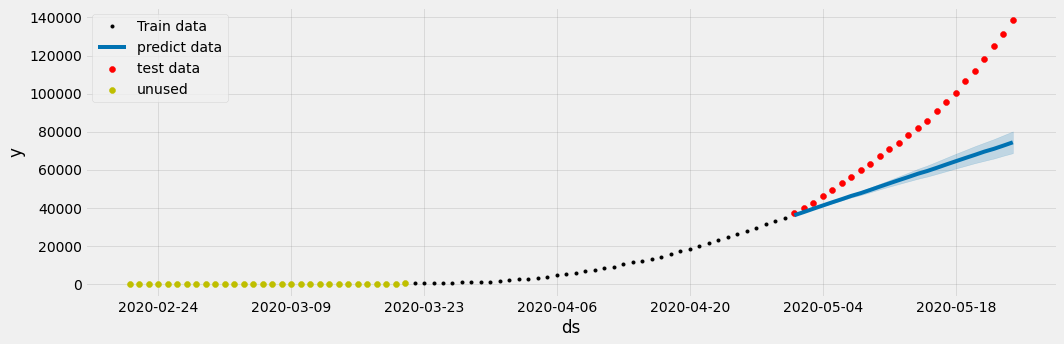

In [43]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test['ds'],test['y'] , color='r',)
ax.scatter(unused['ds'],unused['y'], color='y')
fig = model.plot(test_forcst, ax=ax)
plt.legend(['Train data', 'predict data', 'test data','unused'])

In [44]:
#Regression model

**Regression Molel For COVID-19 Infection Forecasring**

Reading the live data : Confirm Cases in India


In [45]:
url = 'https://api.covid19india.org/data.json'
 
data = requests.get(url=url).json()
data = json.dumps(
    data,
    indent=2,
    ensure_ascii=False,
)
 
f = open('pandemiculator/data/data.json', 'w')
f.write(data)
f.close()
# JSON file to CSV 
# Opening JSON file and loading the data 
# into the variable data 
with open('pandemiculator/data/data.json') as json_file: 
    data = json.load(json_file) 
 
patient_data = data['cases_time_series'] 
 
# now we will open a file for writing 
data_file = open('pandemiculator/data/data.csv', 'w') 
 
# create the csv writer object 
csv_writer = csv.writer(data_file) 
 
# Counter variable used for writing 
# headers to the CSV file 
count = 0
 
for pt in patient_data: 
    if count == 0: 
 
        # Writing headers of CSV file 
        header = pt.keys() 
        csv_writer.writerow(header) 
        count += 1
 
    # Writing data of CSV file 
    csv_writer.writerow(pt.values()) 
 
data_file.close() 

#print('done')

Reading & preprocessing the data

In [46]:
covid_raw_data= pd.read_csv(r"pandemiculator/data/data.csv",sep=",",encoding='cp1252')
covid_confirmed= pd.DataFrame(covid_raw_data)
days = np.array([i for i in range(len(covid_confirmed['date']))])
confirm=covid_confirmed['totalconfirmed']
#covid_raw_data

**Line plot**

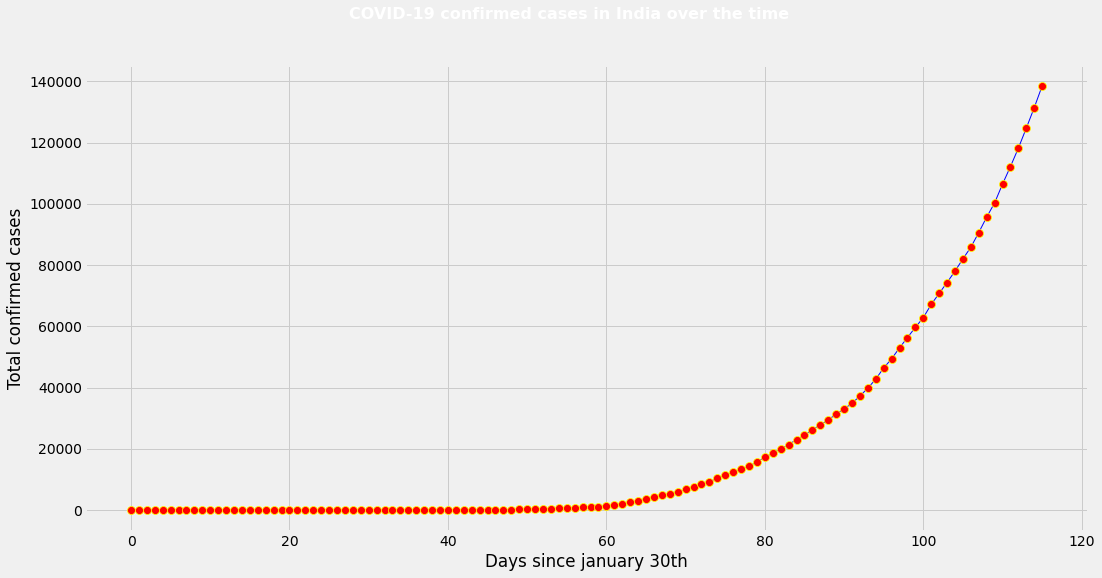

In [47]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(x=days, y=confirm,
             markeredgecolor="yellow", markerfacecolor="red", markersize=8, marker="o",
             sort=False, linewidth=1, color="blue")

plt.suptitle(f"COVID-19 confirmed cases in India over the time", fontsize=16, fontweight='bold', color='white')
plt.ylabel('Total confirmed cases')
plt.xlabel('Days since january 30th')

plt.show()

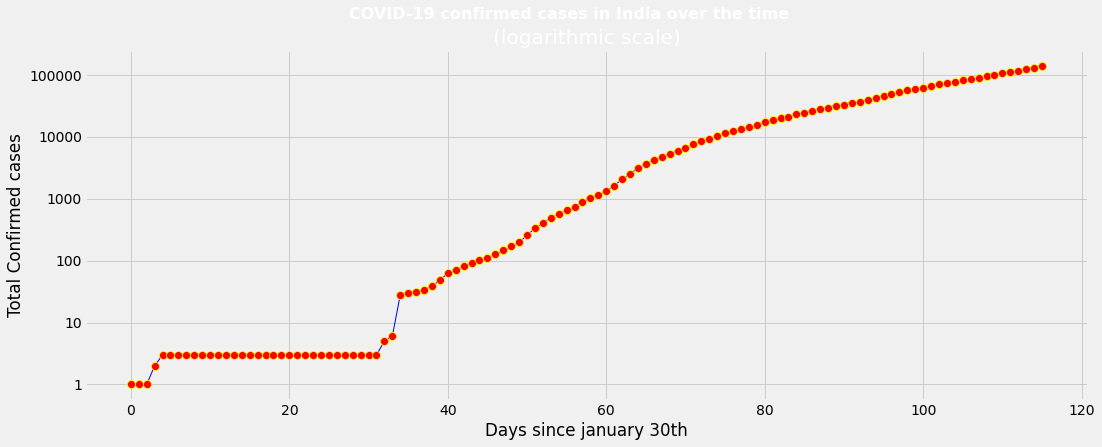

In [48]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=confirm,
             markeredgecolor="yellow", markerfacecolor="red", markersize=8, marker="o",
             sort=False, linewidth=1, color="blue")

plt.suptitle(f"COVID-19 confirmed cases in India over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Total Confirmed cases')
plt.xlabel('Days since january 30th')

plt.show()

In [49]:
SKIP_DAYS = 90
covid_confirmed_skip_days = list(covid_confirmed['totalconfirmed'][SKIP_DAYS:])

X = days[SKIP_DAYS:].reshape(-1, 1)
y = list(np.log(covid_confirmed_skip_days))


Tranning and testing data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=False)


Linear Regression model 

In [51]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

Error calculation


In [52]:
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

MAE: 0.03943733263535343
MSE: 0.0015732090474542566


Applying Linear regression formula for predicting infection rate for next 30 days

In [53]:
a = linear_model.coef_
b = linear_model.intercept_
X_forecast = list(np.arange(len(days), len(days) + 30))
y_forecast = [(a*x+b)[0] for x in X_forecast]

In [54]:
y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_forecast_l = list(np.exp(y_forecast))

Ploting Linear Regression forcasting of COVID-19 for next 390 days : logarithmic Scale

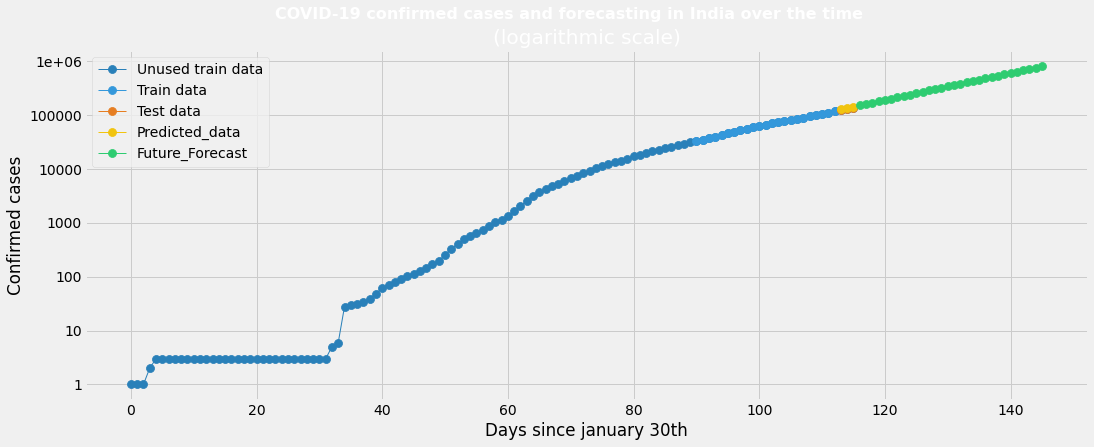

In [55]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_raw_data['totalconfirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")
sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=X_forecast, y=y_forecast_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2ecc71")


plt.suptitle(f"COVID-19 confirmed cases and forecasting in India over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since january 30th')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predicted_data', 'Future_Forecast'])

plt.show()

Ploting Linear Regression forcasting of COVID-19 for next 390 days : Final Plot


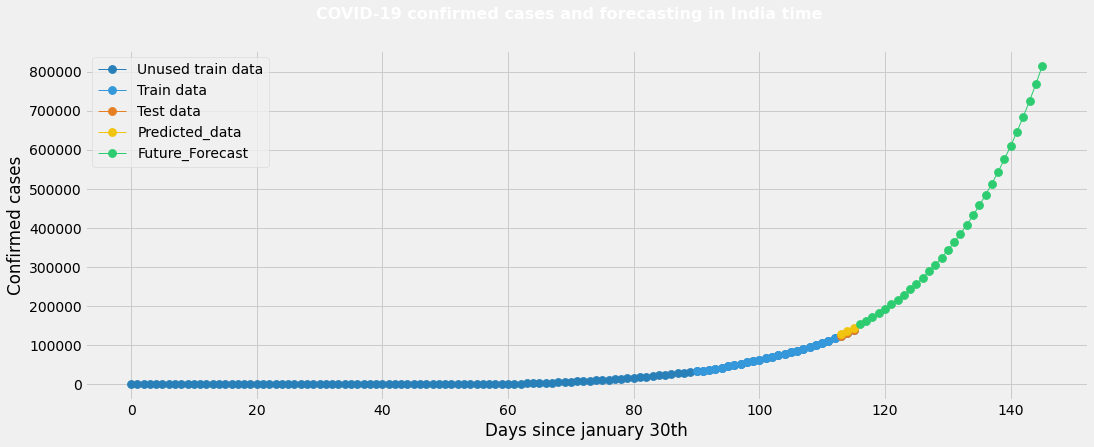

In [56]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_raw_data['totalconfirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=X_forecast, y=y_forecast_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in India time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since january 30th')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predicted_data', 'Future_Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()

In [57]:
#Clustering

## CLUSTERING BASED ON CLINICAL PARAMETERS AND AGE

In [58]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [59]:
Covid19_Symptoms = pd.read_csv("pandemiculator/data/COVID19_line_list_dataNew.csv")
#Covid19_Symptoms

In [60]:
Covid19_Symptoms.set_index("id", inplace=True)

In [61]:
Covid19_Symptoms.shape

(1085, 19)

In [62]:
Covid19_Symptoms.dropna(subset=['age'], inplace=True)

In [63]:
#Covid19_Symptoms

In [64]:
Covid_Data = Covid19_Symptoms.drop('case_in_country', axis=1)
Covid_Data = Covid_Data.drop('reporting date', axis=1)
Covid_Data = Covid_Data.drop('hosp_visit_date', axis=1)
Covid_Data = Covid_Data.drop('exposure_start', axis=1)
Covid_Data = Covid_Data.drop('exposure_end', axis=1)
Covid_Data = Covid_Data.drop('symptom_onset', axis=1)
Covid_Data = Covid_Data.drop('gender', axis=1)
Covid_Data = Covid_Data.drop('location', axis=1)
Covid_Data = Covid_Data.drop('country', axis=1)
Covid_Data = Covid_Data.drop('summary', axis=1)
Covid_Data = Covid_Data.drop('symptom', axis=1)
Covid_Data = Covid_Data.drop('If_onset_approximated', axis=1)
Covid_Data = Covid_Data.drop('visiting Wuhan', axis=1)
Covid_Data = Covid_Data.drop('from Wuhan', axis=1)
Covid_Data = Covid_Data.drop('death', axis=1)
Covid_Data = Covid_Data.drop('recovered', axis=1)


#Covid_Data

In [65]:
Covid_Data.reset_index(inplace=True)

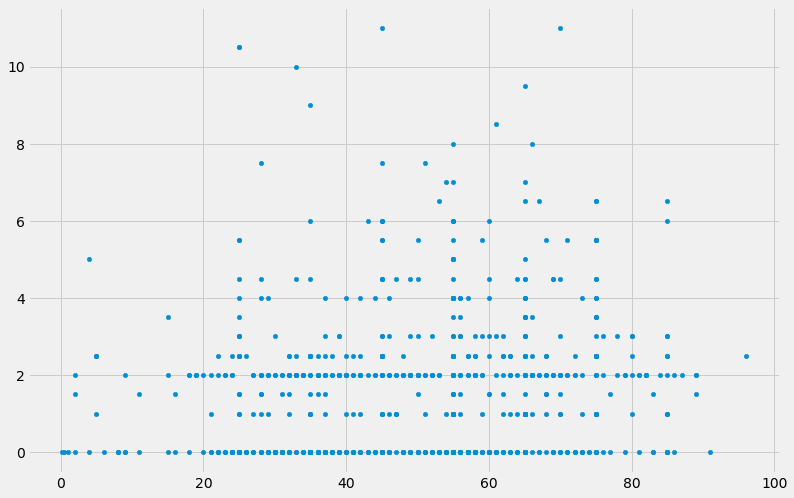

In [66]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(Covid_Data['age'],Covid_Data['Symptoms_Weights'], s=20)

In [67]:
labels_1 = np.array([0 for i in range(281)])

labels_2 = np.array([1 for i in range(281)])

labels_3 = np.array([2 for i in range(281)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3 , axis=0)

In [68]:
df = pd.DataFrame({'data_x': Covid_Data['age'], 'data_y': Covid_Data['Symptoms_Weights'], 'labels':labels, 'data_index': Covid_Data['id']})
df.sample(10)

,data_x,data_y,labels,data_index
617,55.0,0.0,2,677
266,85.0,0.0,0,296
771,70.0,4.5,2,925
178,40.0,2.0,0,186
618,85.0,0.0,2,678
208,35.0,1.0,0,237
393,65.0,4.5,1,426
764,37.0,4.0,2,918
293,85.0,0.0,1,325
117,40.0,2.0,0,121


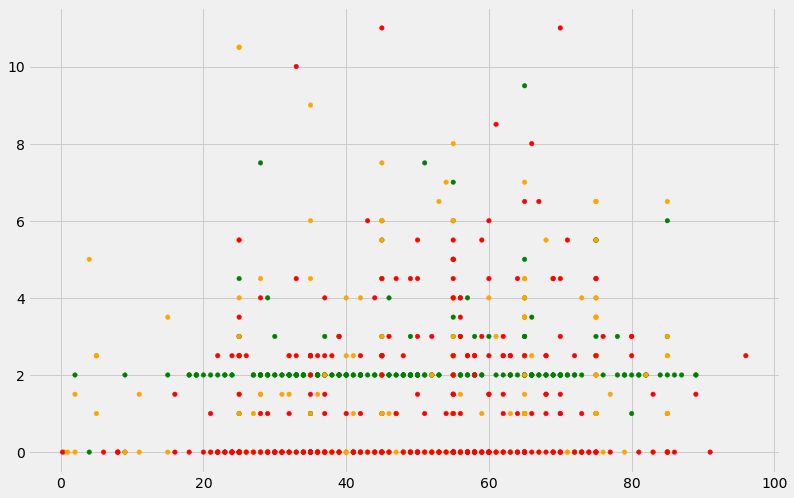

In [69]:
colors = ['green', 'orange', 'red']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=20, cmap=matplotlib.colors.ListedColormap(colors))

In [70]:
kmeans_model = KMeans(n_clusters=3, max_iter=100000).fit(Covid_Data[['age', 'Symptoms_Weights','Medical History']])

#kmeans_model.labels_

In [71]:
centroids = kmeans_model.cluster_centers_
centroids

array([[51.80124224,  1.67546584,  0.97826087],
       [29.05815972,  1.25520833,  1.04861111],
       [71.527897  ,  1.94206009,  1.03433476]])

In [72]:
Covid_Data['Risk_levels'] = kmeans_model.labels_

In [73]:
#Covid_Data

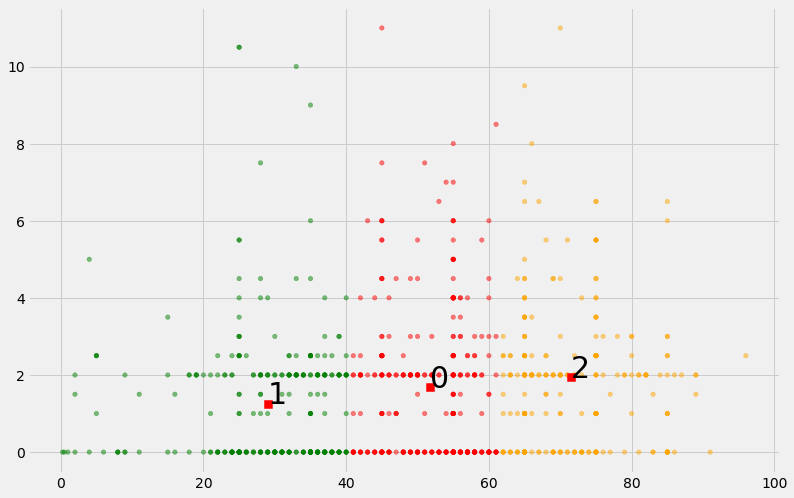

In [74]:
colors = ['red', 'green', 'orange']

plt.figure(figsize=(12,8))

plt.scatter(Covid_Data['age'], Covid_Data['Symptoms_Weights'], c=Covid_Data['Risk_levels'], s=20, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=50, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=30)

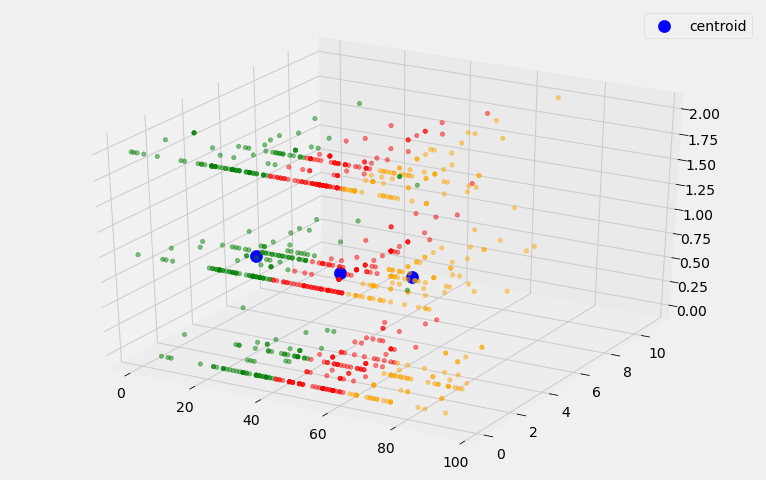

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


plt.figure('K-Means on Covid19_Data', figsize=(12,8))
ax = plt.axes(projection = '3d')
ax.scatter(Covid_Data['age'], Covid_Data['Symptoms_Weights'],  Covid_Data['Medical History'],
           c=Covid_Data['Risk_levels'], s=20, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)


ax.scatter(centroids[0,0],centroids[0,1],centroids[0,2] ,c='blue', s=150, label='centroid')
ax.scatter(centroids[1,0],centroids[1,1],centroids[1,2] ,c='blue', s=150)
ax.scatter(centroids[2,0],centroids[2,1],centroids[2,2] ,c='blue', s=150)

ax.legend()

In [76]:
PatientsRiskCategory = Covid_Data.groupby(['Risk_levels']).size().reset_index(name='count')

In [77]:
PatientsRiskCategory

,Risk_levels,count
0,0,322
1,1,288
2,2,233


## VACCINATION STRATEGY USING SEIRV MODEL

In [78]:
# SEIRV model for Vaccinnation strategy

We can successfully immunize a fraction 0 < p ≤ 1 of the population 
Define Rt to be the reproduction number of the immunized population
  
  Rt ≤ R0(1−p)
Since our threshold criterion is for Rt < 1, 

we can easily solve this inequality for p

Denote the critical fraction successfully immunized as pc

pc = 1 − (1/R0)

![SEIRV](https://drive.google.com/uc?id=1DLq9UPZj6beZA_k7ybhwC1-m46dF76Ww)

![SEIRVformula](https://drive.google.com/uc?id=1wCIAv6SuCvckugBxAqc5_wavOVJupmMG)

In [0]:
# Define the SEIRV function
def SEIRV_FN ( v , t , Lambda, betaE, betaI, betaV, mu, alpha, gamma, xi1, xi2, sigma, N ):
    S, E, I, R, V = v
    dS_dt = Lambda - betaE * S * E - betaI * S * I - betaV * S * V - mu * S
    dE_dt = betaE * S * E + betaI * S * I + betaV  * S * V - (alpha + mu) * E 
    dI_dt = alpha * E - (w + gamma + mu) * I 
    dR_dt = gamma * I - mu * R
    dV_dt = xi1 * E + xi2 * I - sigma * V; 

    return([dS_dt, dE_dt, dI_dt, dR_dt, dV_dt])

In [0]:
# Define the parameters
tmax= 100 #days
dt= .1

# Initialize the variables

S0 = 1300000000 # susceptible to infect 
E0 = 200000 # exposed (infected asymptomatic) 
I0 = 140000 # infected (with symptoms and isolates) 
R0 = 60000 # recovered 
V0 = 216666666# Vaccinated populaiton

N = S0 + E0 + I0 + R0 + V0
initial_state = [ S0, E0, I0, R0, V0 ]

In [0]:
# Calculate the rate constants  as per paper http://doi.org/10.3934/mbe.2020148 
#epsilon is the inverse of the incubation period (1/t_incubation)
#beta is the average contact rate in the population
#gamma is the inverse of the mean infectious period (1/t_infectious)


Lambda = 271.23  # population flow (per day) 
betaE = 3.11e-8 # transmission rate between S and E (/ people / day) 
betaI = 0.62e-8 # transmission rate between S and I (/ people / day) 
betaV = 1.03e-8 # transmission rate between S and V (/ people / day) 
c = 1.01e-4   #transmission adjustment coefficient 
mu = 3.01e-5  #natural death rate (per day) 
latency_time=14 #days
alpha = 1/latency_time  # 1 / alpha = incubation period (/ days) 
w = 0.01  # infection failure rate (per day) 
recovery_time=30 #days
gamma = 1/recovery_time # infection recovery rate (per day) 
sigma = 1 # virus removal rate from the environment (per day) 
xi1 = 2.30 # dispersion of the virus by asymptomatic infected 
xi2 = 0  # and by isolated infected (per person per day per ml)

In [349]:
# Solving the differential equations
steps = np . arange ( 0 , tmax , dt )
args = ( Lambda, betaE, betaI, betaV, mu, alpha, gamma, xi1, xi2, sigma, N)
solutionseirv = odeint ( SEIRV_FN , initial_state , steps , args )
print(solutionseirv)

#df = pd.DataFrame(data=solutionseirv)
#df.to_csv(r'/content/drive/My Drive/pandemiculator/seirv.csv', index = False)

#df = solutionseirv
#print(df.describe)
#f = df[df[0] == df[3] ]
#print(f)

[[1.30000000e+09 2.00000000e+05 1.40000000e+05 6.00000000e+04
  2.16666666e+08]
 [2.73311048e+08 1.02385590e+09 3.16487141e+06 6.32998166e+04
  2.90905364e+08]
 [3.96079515e+06 1.28445595e+09 1.18791410e+07 8.79540149e+04
  5.31622945e+08]
 ...
 [7.57470077e+02 1.05586406e+06 4.12880399e+07 9.64772057e+08
  2.61478360e+06]
 [7.60679090e+02 1.04836972e+06 4.11168872e+07 9.64906494e+08
  2.59622037e+06]
 [7.63899775e+02 1.04092873e+06 4.09464219e+07 9.65040362e+08
  2.57778929e+06]]


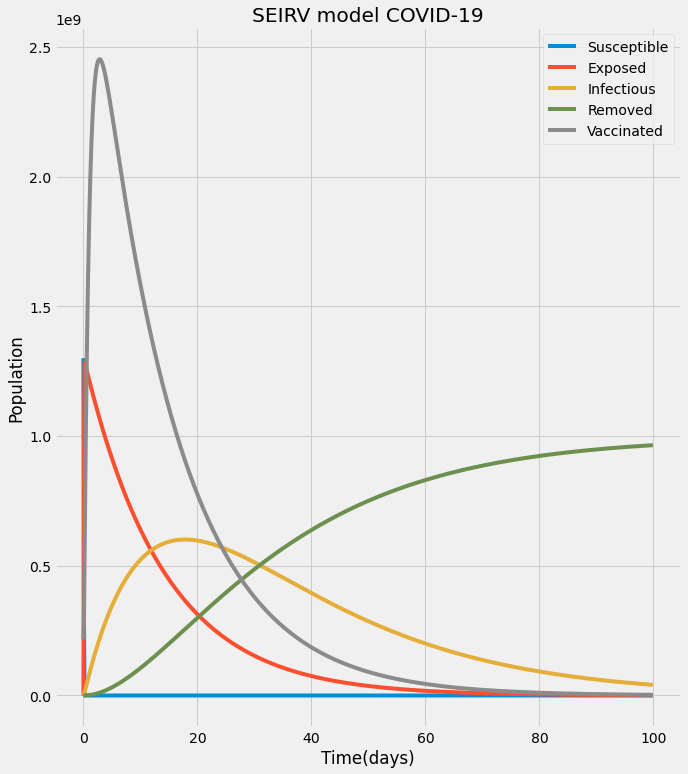

In [350]:
# Plot the graph
plt . plot ( steps , solutionseirv )
plt . legend ([ 'Susceptible' , 'Exposed' , 'Infectious' , 'Removed', 'Vaccinated'])
plt . title ( "SEIRV model COVID-19" )
plt . xlabel ( 'Time(days)' )
plt . ylabel ( 'Population' )
plt . grid ('true')
plt . show ()

## RESULTS

* The live data of Indian significance from Covid19.org was fetched
* Data was preprocessed and used in json format
* The current sceario of COVID19 spread in India is demonstrated in various ways and Statewise data trends are represented from highest to lowest infections.
* Prediction of Pandemic was done based on regression and Prophet model.
* As per our prediction total infected population is expected as 2 lakh cases in India as on 31 May 2020. The date when lockdown 4.0 is expected to ends.
* The Ro (basic reproduction number) values and its significance is demonstrated.
* Compartmental mathematical models like SEIRD are used to demonstrate the lockdown effect in decreasing the Ro from 2.72 to 1.37
* Clustering was done based on Clinical parameters and age to distinguish the population as high to low risk
* Vaccination estimation was done usind Compartmental mathematicla model SEIRV
* It is estimated that 30% of population need to be vaccinated for optimal use of vaccination 
* The clustering of population can also be considered for vaccination priorities.







## REFERENCES:
1) https://web.stanford.edu/~jhj1/teachingdocs/Jones-Epidemics050308.pdf

2) https://www.kaggle.com/allen-institute-for-ai/CORD-19-researchchallenge/tasks

3) Peng,	Liangrong,	Wuyue	Yang,	Dongyan	Zhang,	Changjing	Zhuge,	and	Liu	Hong.	"Epidemic	analysis	of	COVID-19	in	China by	dynamical	modeling."	arXiv	preprint	arXiv:2002.06563	(2020).

4) https://www.eetindia.co.in/Covid-19-The-Power-of-AI-and-Big-Data/

5) https://en.wikipedia.org/wiki/Kermack–McKendrick_theory

6 )Age-structured	impact	of	social	distancing	on	the	COVID-19	epidemic	in	India	:	Rajesh	Singh,	R.	Adhikari (https://arxiv.org/abs/2003.12055)

7) SEIR	and	Regression	Model	based	COVID-19	outbreak	predictions	in	India	Gaurav	Pandey,	Poonam	Chaudhary,	Rajan Gupta,	Saibal	Pal	(https:// arxiv.org/abs/2004.00958)

8) SEIRD model for COVID-19 (https://medium.com/@djconnel_14663/seird-model-of-covid-19-596e6754c2c4)

9) Nguyen, Chantal, and Jean M. Carlson. "Optimizing real-time vaccine allocation in a stochastic SIR model." PloS one 11, no. 4 (2016).

10) https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf

11) https://www.healthline.com/health/r-nought-reproduction-number#conditions-it-measures